# EDA on Crime Dataset (Spring 2023)
--------------------------------
**Dr. Dave Wanik - Department of Operations and Information Management - University of Connecticut**


Note: This assignment is used for OPIM 5641, 5502 and 5512 - if you are taking more than one of my classes, just submit this assignment for each respective class - thanks! 

Each question is 10 pts.

* **Your name here:** Tharun Palla
* **Your student ID here:** tmp21011

You can ask your fellow classmates for help, but everyone must do their own work with lots of comments and text cells. Anyone who directly copies or allows their work to be directly copied gets a 0 on the assignment and final letter grade lowered by one letter.

If you are new to Python, this assignment might be tricky - come to office hours for help! I've left some old output printed so that you can check your work.

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Intro

Whenever I start a class off, I like to make sure that students have basic EDA chops in Python. This semester I picked a structured time series dataset from Wikipedia which tracks violent crime per State over a few years. This homework tests your skill at using data to tell a story about crime in the US. Good luck!

![crime map from Wiki](https://upload.wikimedia.org/wikipedia/commons/5/51/Violent_Crime_Rate_by_U.S._state.svg)

In [2]:
# read the data
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate')[0]
df.head()

State or Territory            2020                     \
     State or Territory Incidence Count Violent Crime Rate   
0                   NaN             NaN                NaN   
1  District of Columbia          7127.0              999.8   
2                Alaska          6126.0              837.8   
3            New Mexico         16393.0              778.3   
4             Tennessee         46328.0              672.7   

  Historical Violent Crime Rates                                         \
                            2019   2018    2017    2016    2015    2014   
0                            NaN    NaN     NaN     NaN     NaN     NaN   
1                         1045.2  997.1  1002.7  1203.5  1269.1  1242.6   
2                          865.0  891.7   856.7   804.6   730.2   635.5   
3                          824.0  842.8   778.6   699.4   656.1   597.7   
4                          598.9  630.4   655.0   638.5   612.1   610.7   

                           
     2013    2012    2011  
0     NaN     NaN     NaN  
1  1281.9  1241.8  1202.1  
2   602.6   604.1   606.5  
3   596.7   559.6   567.5  
4   579.7   638.5   608.2

This dataset is a bit dirty - let's clean it up!

# Q1. Collapse the multi-index
The index is really a double index with two layers - which in my experience is quite annoying in most cases. 

In [3]:
# look at this complicated multiIndex
df.columns

MultiIndex([(            'State or Territory', 'State or Territory'),
            (                          '2020',    'Incidence Count'),
            (                          '2020', 'Violent Crime Rate'),
            ('Historical Violent Crime Rates',               '2019'),
            ('Historical Violent Crime Rates',               '2018'),
            ('Historical Violent Crime Rates',               '2017'),
            ('Historical Violent Crime Rates',               '2016'),
            ('Historical Violent Crime Rates',               '2015'),
            ('Historical Violent Crime Rates',               '2014'),
            ('Historical Violent Crime Rates',               '2013'),
            ('Historical Violent Crime Rates',               '2012'),
            ('Historical Violent Crime Rates',               '2011')],
           )

Renaming Columns


In [4]:
df.columns = ["_".join(a) for a in df.columns.to_flat_index()]
df.rename(columns = {'State or Territory_State or Territory' : 'State or Territory'}, inplace = True)
df.head()

,State or Territory,2020_Incidence Count,2020_Violent Crime Rate,Historical Violent Crime Rates_2019,Historical Violent Crime Rates_2018,Historical Violent Crime Rates_2017,Historical Violent Crime Rates_2016,Historical Violent Crime Rates_2015,Historical Violent Crime Rates_2014,Historical Violent Crime Rates_2013,Historical Violent Crime Rates_2012,Historical Violent Crime Rates_2011
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2


# Q2. What is the shape of the dataframe?

In [18]:
df.shape

(50, 12)

# Q3. Count the number of missing values per column, then print a list of unique values for the State/territory column.

In [7]:
df = df.dropna(subset=['State or Territory'])
df.shape
df.isna().sum()

State or Territory                     0
2020_Incidence Count                   0
2020_Violent Crime Rate                0
Historical Violent Crime Rates_2019    0
Historical Violent Crime Rates_2018    0
Historical Violent Crime Rates_2017    0
Historical Violent Crime Rates_2016    0
Historical Violent Crime Rates_2015    0
Historical Violent Crime Rates_2014    0
Historical Violent Crime Rates_2013    0
Historical Violent Crime Rates_2012    0
Historical Violent Crime Rates_2011    0
dtype: int64

In [8]:
df = df[np.isin(df['State or Territory'], ['District of Columbia' , 'United States', 'Puerto Rico'], invert = True)]
df.shape

(50, 12)

In [19]:
df.head()

,State or Territory,2020_Incidence Count,2020_Violent Crime Rate,Historical Violent Crime Rates_2019,Historical Violent Crime Rates_2018,Historical Violent Crime Rates_2017,Historical Violent Crime Rates_2016,Historical Violent Crime Rates_2015,Historical Violent Crime Rates_2014,Historical Violent Crime Rates_2013,Historical Violent Crime Rates_2012,Historical Violent Crime Rates_2011
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2
5,Arkansas,20363.0,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6,480.9
6,Arizona,35980.0,654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6,405.9


# Q4. Which State had the highest and lowest crime rate in 2020?

You can either sort by high and low to show the tail, or you can select the row where the min and max 2020 rates exist. Do not just print the value of the min and max!

In [10]:
highest = df.where(df['2020_Violent Crime Rate'] == np.max(df['2020_Violent Crime Rate'])).dropna()
lowest =  df.where(df['2020_Violent Crime Rate'] == np.min(df['2020_Violent Crime Rate'])).dropna()
print(np.array(highest['State or Territory']), np.array(lowest['State or Territory']))

['Alaska'] ['Maine']


# Q5. Make a line plot that shows the trend of violent crime in Alaska.
One plot for each State. X = year and Y = violent crime. Have nice titles, axes and a unique color for each plot. Note that this question probably requires you to take the transpose or to create a pivot table (your choice.)

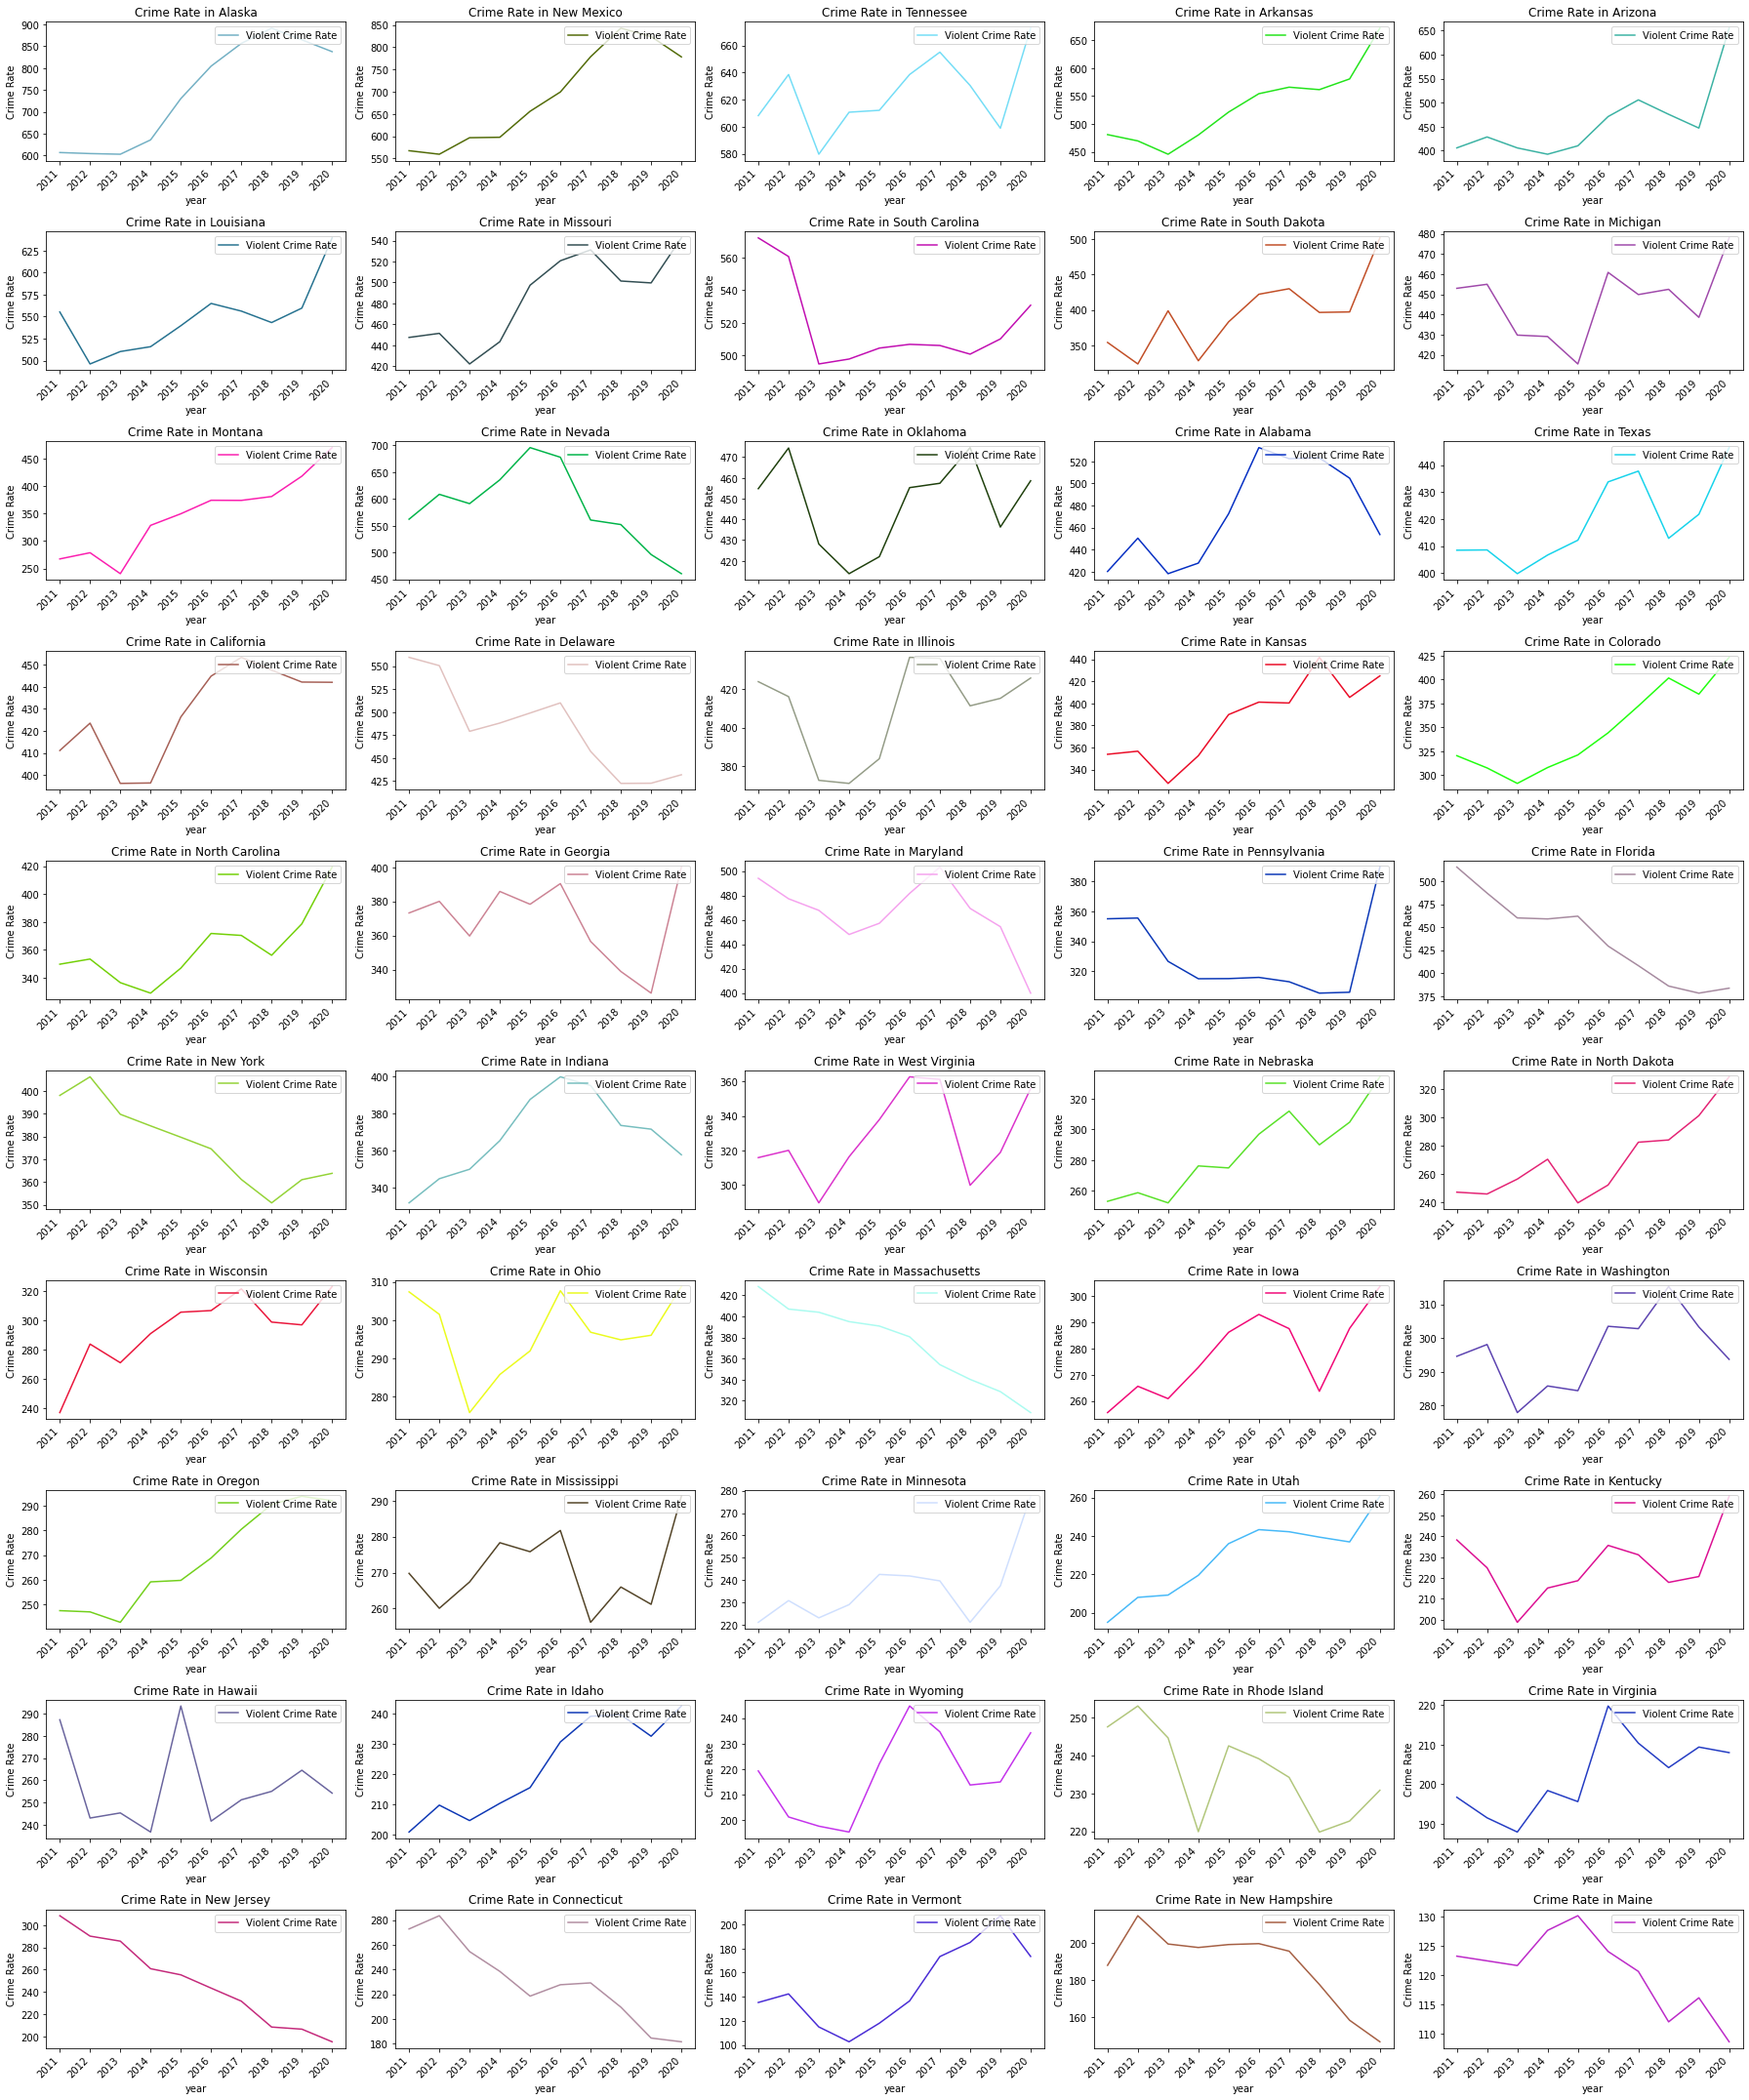

In [11]:
plt.figure(figsize= (25,30))
for i,state in enumerate(df['State or Territory']):
  state_df = df.where(df['State or Territory'] == state).dropna()
  state_df = state_df.transpose()[2:]
  state_df = state_df.reset_index()
  state_df.columns = ['Year', "CrimeRate"]
  state_df['Year'] = state_df['Year'].str.extract("(\d+)")
  state_df = state_df[::-1]
  col = (np.random.random(), np.random.random(), np.random.random())
  plt.subplot(10,5,i+1)
  plt.plot(state_df.Year,state_df.CrimeRate , label ='Violent Crime Rate' ,color = col)
  plt.legend(loc='upper right')
  plt.xlabel("year")
  plt.xticks(rotation=45, ha='right')
  plt.ylabel("Crime Rate")
  plt.title("Crime Rate in {0}".format(state))
plt.tight_layout()
plt.show()




Students may opt to make a new column for Year, or they can use a long column name so long as data doesn't overlap on the X axis.

# Q6. Which States had crime rates go down in 2020 vs. 2019?

Print the unique values in the State column after you do your subset.

In [12]:
states = np.array(df.where(df['2020_Violent Crime Rate'] < df['Historical Violent Crime Rates_2019']).dropna()['State or Territory'].unique())
print(states)

['Alaska' 'New Mexico' 'Nevada' 'Alabama' 'California' 'Maryland'
 'Indiana' 'Massachusetts' 'Washington' 'Oregon' 'Hawaii' 'Virginia'
 'New Jersey' 'Connecticut' 'Vermont' 'New Hampshire' 'Maine']


# Q7. Compute the raw change between 2020 and 2019 for all States and print summary statistics.
This one should have the raw units of Y - add a text cell and describe what you see in the summary statistics output.

In [13]:
change = pd.DataFrame(df[['State or Territory', "2020_Violent Crime Rate", "Historical Violent Crime Rates_2019"]])
change['Difference'] = change['2020_Violent Crime Rate'] - change['Historical Violent Crime Rates_2019']
change.describe()

,2020_Violent Crime Rate,Historical Violent Crime Rates_2019,Difference
count,50.000000,50.000000,50.000000
mean,387.422000,366.968000,20.454000
std,158.952549,150.412832,44.755359
min,108.600000,116.100000,-54.500000
25%,280.925000,262.025000,-6.375000
50%,373.700000,344.850000,17.550000
75%,457.350000,438.025000,38.475000
max,837.800000,865.000000,207.700000


# Q8. Make a nice boxplot or histogram for the output from Q7.

Add nice labels and titles and a fun color for your boxplot.

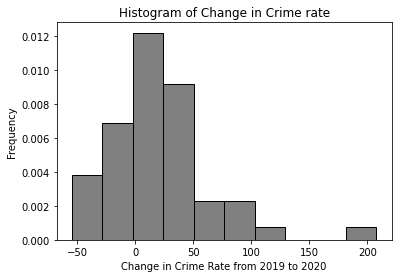

In [14]:
plt.hist(change['Difference'], color ="gray", edgecolor = "black", density = True)
plt.xlabel("Change in Crime Rate from 2019 to 2020")
plt.ylabel("Frequency")
plt.title("Histogram of Change in Crime rate")
plt.show()

# Q9. Compute the percentage change between 2020 and 2019 for all States and print summary statistics

This one should be a percentage, of course! Don't forget to multiply by 100. The denominator should be 2019.

In [15]:
change['Percentage Change'] = (change['Difference']/change['Historical Violent Crime Rates_2019']) *100
change.describe()

,2020_Violent Crime Rate,Historical Violent Crime Rates_2019,Difference,Percentage Change
count,50.000000,50.000000,50.000000,50.000000
mean,387.422000,366.968000,20.454000,5.415681
std,158.952549,150.412832,44.755359,11.120359
min,108.600000,116.100000,-54.500000,-16.312741
25%,280.925000,262.025000,-6.375000,-2.764665
50%,373.700000,344.850000,17.550000,4.566601
75%,457.350000,438.025000,38.475000,10.552274
max,837.800000,865.000000,207.700000,46.454932


# Q10. Make a nice boxplot or histogram for the output from Q9.

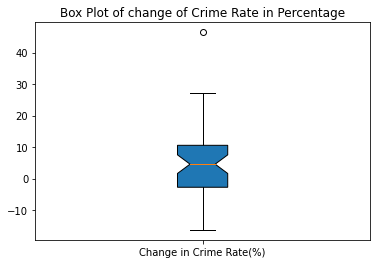

In [16]:
plt.boxplot(change['Percentage Change'], notch=True, patch_artist=True, labels =['Change in Crime Rate(%)'])
plt.title("Box Plot of change of Crime Rate in Percentage")
plt.show()

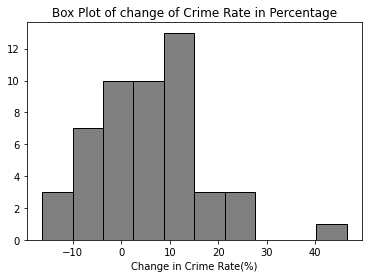

In [17]:
plt.hist(change['Percentage Change'] , edgecolor="black", color = "gray")
plt.title("Box Plot of change of Crime Rate in Percentage")
plt.xlabel("Change in Crime Rate(%)")
plt.show()